In [16]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords,wordnet
from wordcloud import WordCloud , STOPWORDS
import warnings
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

warnings.filterwarnings('ignore')
%matplotlib inline

In [17]:
df = pd.read_csv("tweet.csv")

In [18]:
# pip install wordcloud

In [19]:
# pip install nltk

In [20]:
df.shape

(81408, 2)

In [21]:
df.head()

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative


In [22]:
df["tweets"][0]

'Be aware  dirty step to get money  #staylight #staywhite  #sarcastic #moralneeded @… https://t.co/Oj6BdyX3WG'

In [23]:
df["class"].value_counts()

class
figurative    21238
irony         20894
sarcasm       20681
regular       18595
Name: count, dtype: int64

# checking null value

In [24]:
df.isna().sum()

tweets    0
class     0
dtype: int64

In [25]:
df.duplicated().sum()

49

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df.duplicated().sum()

0

In [28]:
df[df["tweets"].duplicated()]

,tweets,class
21238,"Fav moment in Sepp Blatter vid (0:20): ""We hav...",irony
21239,Just found this while walking my human.... #ir...,irony
21241,Do you know that super yeay satisfying feeling...,irony
21242,If you're going to call someone ignorant and s...,irony
21243,Tune in to Nigezie and be treated to Rachel Pl...,irony
...,...,...
80427,"Approach, stick, and get infected. #funny #sar...",sarcasm
80432,Only newlyweds and liars have sex every day. #...,sarcasm
80435,@CoralieAlison YEAH! LETS GIVE WOMEN RIGHTS BY...,sarcasm
80463,"Demolishing homes, targeting parents, stealing...",sarcasm


In [29]:
13362/81408*100

16.41362028301887

16% data are duplicated which is greater than 10% we cannot remove

In [30]:
df.describe()

,tweets,class
count,81359,81359
unique,67997,4
top,Be aware dirty step to get money #staylight ...,figurative
freq,2,21235


# Data Cleaning 

In [31]:
def clean_text(text):
    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # Remove links
    text = re.sub(r'http\S+', '', text)
    
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove non-english alphabets
    text = ''.join([i for i in text if i.isalpha() or i.isspace()])

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove stopwords and lemmatize the remaining words
    lemma= WordNetLemmatizer()

    tokens = [lemma.lemmatize(i) for i in tokens if not i in stopwords.words('english')]
    
    # Join the tokens back into a string
    text = ' '.join(tokens)

    return text


In [42]:
df["tweets"]= df["tweets"].apply(clean_text(df['tweets']))

TypeError: expected string or bytes-like object, got 'Series'

In [49]:
text=[]
index=[]

for i,j in enumerate(df['tweets']):
    # texts=clean_text(i)
    text.append(j)
    index.append(i)

In [50]:
text

['Be aware  dirty step to get money  #staylight #staywhite  #sarcastic #moralneeded @… https://t.co/Oj6BdyX3WG',
 "#sarcasm for #people who don't understand #diy #artattack http://t.co/rtyYmuDVUS",
 '@IminworkJeremy @medsingle #DailyMail readers being sensible as always #shocker #sarcastic #dailyfail #inHuntspocket #theyhatethenhs',
 '@wilw Why do I get the feeling you like games? #sarcasm',
 '-@TeacherArthurG @rweingarten You probably just missed the text. #sarcastic',
 "Tune in to Nigezie and be treated to Rachel Platten's Fight Song, move to MTV and get Reminisce &amp; Olamide's Local Rapper #Irony #TimesChange",
 'What iz thiz?!?!? A friggin DC love fest??!?!? @andysignore @MurrellDan #Sarcasm #MovieFights',
 'man, i wish i could sexually harass an intoxicated minor and NOT go to jail #sarcasm',
 "@raaachf for the car ride when I get to listen to you and jess the whole time? Yeah woo can't wait either. #sarcasm",
 "Aamir calls #BajrangiBhaijaan as Salman's best movie yet! You decid

In [38]:
df['tweets'][0]

'Be aware  dirty step to get money  #staylight #staywhite  #sarcastic #moralneeded @… https://t.co/Oj6BdyX3WG'

In [40]:
clean_text("Be aware  dirty step to get money  #staylight #staywhite  #sarcastic #moralneeded @… https://t.co/Oj6BdyX3WG'")

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\LENOVO/nltk_data'
    - 'c:\\Users\\LENOVO\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'c:\\Users\\LENOVO\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'c:\\Users\\LENOVO\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\LENOVO\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [ ]:
df["tweets"][0]

'aware dirty step get money staylight staywhite sarcastic moralneeded'

In [ ]:
df.head()

,tweets,class
0,aware dirty step get money staylight staywhite...,figurative
1,sarcasm people dont understand diy artattack,figurative
2,iminworkjeremy medsingle dailymail reader sens...,figurative
3,wilw get feeling like game sarcasm,figurative
4,teacherarthurg rweingarten probably missed tex...,figurative


# Visualization

In [ ]:
df["class"].value_counts()

figurative    21235
irony         20877
sarcasm       20678
regular       18569
Name: class, dtype: int64

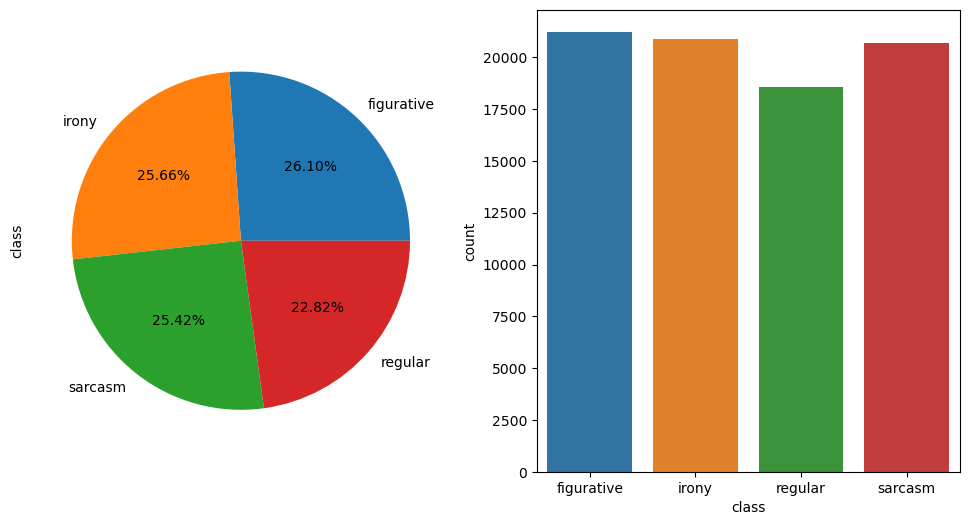

In [ ]:
plt.rcParams['figure.figsize']=(12,6)
[plt.subplot(1,2,1),df["class"].value_counts().plot(kind ='pie',autopct = '%0.2f%%') ]
[plt.subplot(1,2,2),sns.countplot(data=df,x='class')]
plt.show()

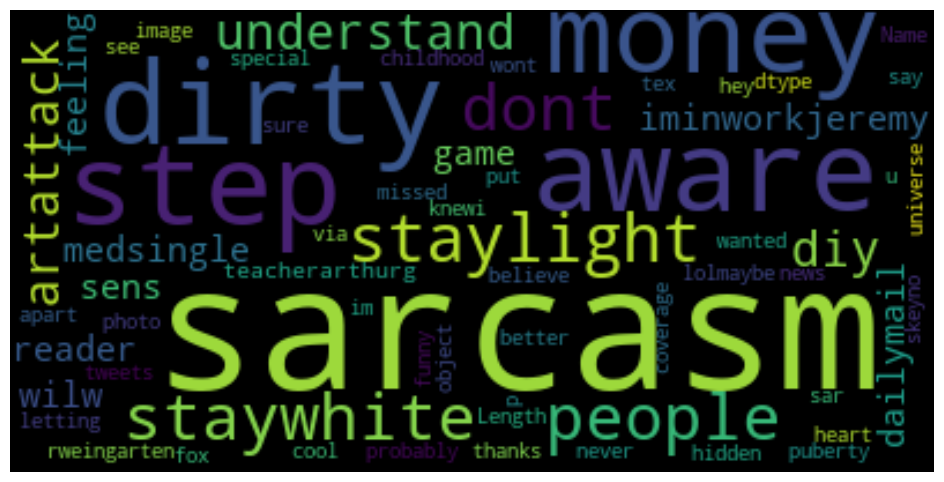

In [ ]:
wc = WordCloud(stopwords=STOPWORDS,
    background_color='black', mode='RGB').generate(str(df["tweets"]))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [ ]:
figurative = df[df['class']=='figurative']
irony = df[df['class']=='irony']
sarcasm = df[df['class']=='sarcasm']
regular = df[df['class']=='regular']

In [ ]:
def wordcl(data,title):
    stop = STOPWORDS
    wc = WordCloud(background_color='black',stopwords=stop).generate(data)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(title)

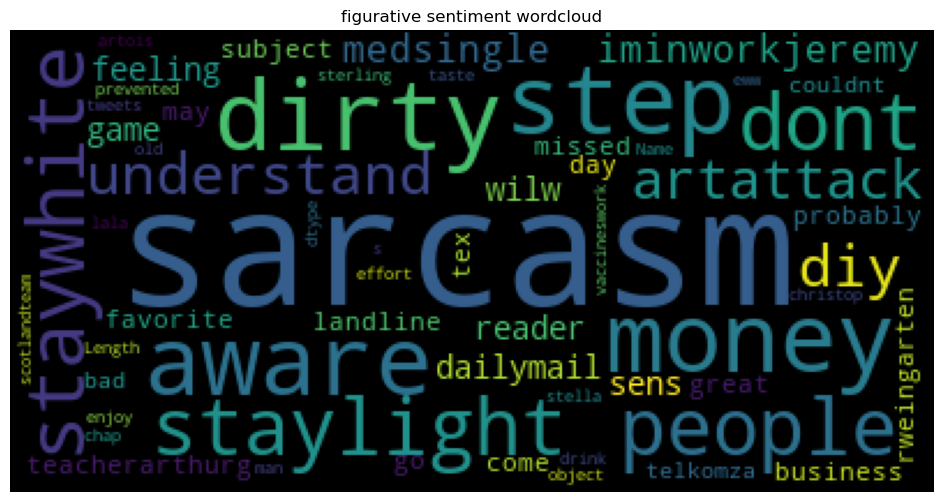

In [ ]:
wordcl(str(figurative['tweets']),'figurative sentiment wordcloud')

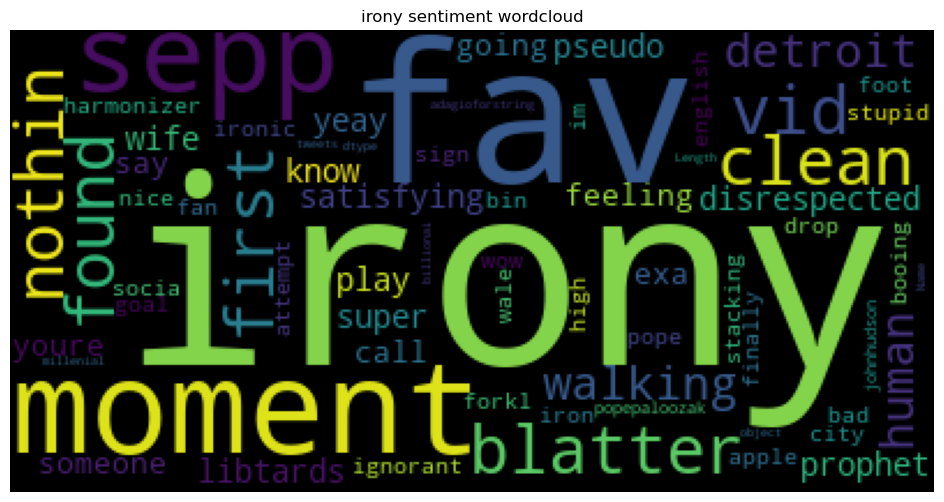

In [ ]:
wordcl(str(irony['tweets']),'irony sentiment wordcloud')

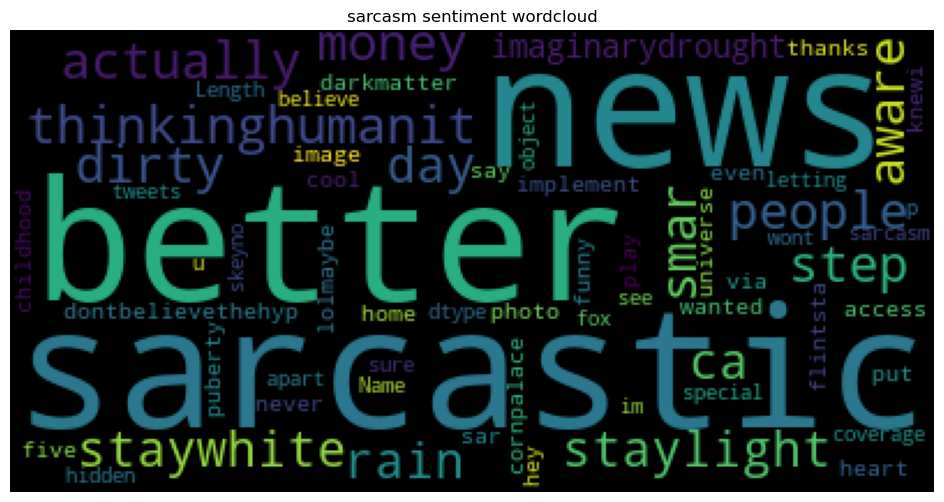

In [ ]:
wordcl(str(sarcasm['tweets']),'sarcasm sentiment wordcloud')

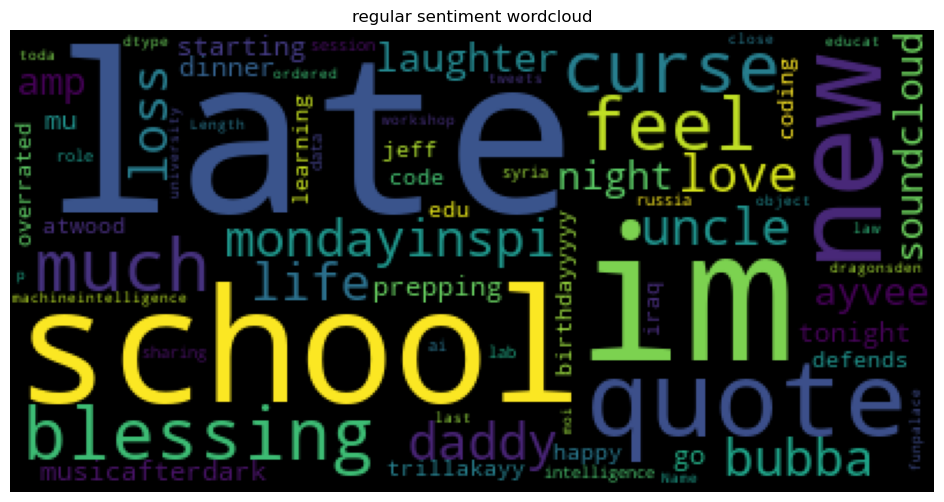

In [ ]:
wordcl(str(regular['tweets']),'regular sentiment wordcloud')

In [ ]:
#No. of words
df['length'] = df['tweets'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df

,tweets,class,length
0,aware dirty step get money staylight staywhite...,figurative,9
1,sarcasm people dont understand diy artattack,figurative,6
2,iminworkjeremy medsingle dailymail reader sens...,figurative,11
3,wilw get feeling like game sarcasm,figurative,6
4,teacherarthurg rweingarten probably missed tex...,figurative,6
...,...,...,...
81403,photo image via heart childhood cool funny sar...,sarcasm,8
81404,never knewi better put universe lolmaybe there...,sarcasm,13
81405,hey wanted say thanks puberty letting apart it...,sarcasm,15
81406,im sure coverage like fox news special hidden ...,sarcasm,13


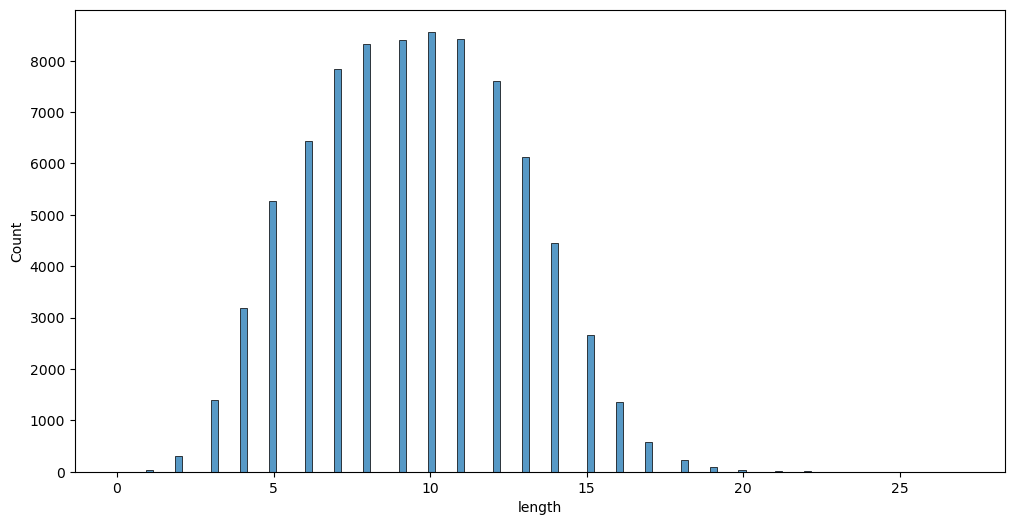

In [ ]:
sns.histplot(df['length'])
plt.show()

this way of analysis is not showing any proper result.

In [ ]:
df['lable'] = df['class'].map({'figurative':3,'irony':2,'sarcasm':1,'regular':0})

In [ ]:
df

,tweets,class,length,lable
0,aware dirty step get money staylight staywhite...,figurative,9,3
1,sarcasm people dont understand diy artattack,figurative,6,3
2,iminworkjeremy medsingle dailymail reader sens...,figurative,11,3
3,wilw get feeling like game sarcasm,figurative,6,3
4,teacherarthurg rweingarten probably missed tex...,figurative,6,3
...,...,...,...,...
81403,photo image via heart childhood cool funny sar...,sarcasm,8,1
81404,never knewi better put universe lolmaybe there...,sarcasm,13,1
81405,hey wanted say thanks puberty letting apart it...,sarcasm,15,1
81406,im sure coverage like fox news special hidden ...,sarcasm,13,1


# Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from nltk.tokenize import word_tokenize
from sklearn.model_selection import GridSearchCV, KFold
from gensim.models import Word2Vec
from sklearn.svm import SVC

# Taking sample data

In [ ]:
min_sample = 5000

df_figurative = df[df['class']=="figurative"].sample(min_sample,random_state=42)
df_irony = df[df['class']=="irony"].sample(min_sample,random_state=42)
df_regular = df[df['class']=="regular"].sample(min_sample,random_state=42)
df_sarcasm = df[df['class']=="sarcasm"].sample(min_sample,random_state=42)

In [ ]:
df_balence = pd.concat([df_figurative,df_irony,df_regular,df_sarcasm],axis = 0)
df_balence['class'].value_counts()

figurative    5000
irony         5000
regular       5000
sarcasm       5000
Name: class, dtype: int64

In [ ]:
X = df_balence['tweets']
Y = df_balence['lable']

# TF-IDF Uni-gram

In [ ]:
def predict(model):
    model = model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    trainac = model.score(xtrain, ytrain)
    testac = model.score(xtest, ytest)
    
    print(f"Train accuracy {trainac}\nTest accuracy {testac}")
    
    print(classification_report(ytest, ypred))

In [ ]:
tf =  TfidfVectorizer(ngram_range=(1,1))
x = tf.fit_transform(df_balence['tweets'])

#x = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
y = df_balence['lable']

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.35,random_state=1)

In [ ]:
predict(AdaBoostClassifier())

Train accuracy 0.7143846153846154
Test accuracy 0.7111428571428572
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1775
           1       0.65      0.95      0.77      1701
           2       0.67      0.77      0.71      1741
           3       0.34      0.15      0.20      1783

    accuracy                           0.71      7000
   macro avg       0.67      0.71      0.67      7000
weighted avg       0.67      0.71      0.67      7000



In [ ]:
predict(GradientBoostingClassifier())

Train accuracy 0.7691538461538462
Test accuracy 0.7415714285714285
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1775
           1       0.65      0.98      0.79      1701
           2       0.66      0.99      0.79      1741
           3       0.39      0.02      0.04      1783

    accuracy                           0.74      7000
   macro avg       0.68      0.75      0.65      7000
weighted avg       0.68      0.74      0.65      7000



In [ ]:
predict(DecisionTreeClassifier())

Train accuracy 0.9728461538461538
Test accuracy 0.6685714285714286
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1775
           1       0.65      0.75      0.70      1701
           2       0.64      0.71      0.67      1741
           3       0.30      0.23      0.26      1783

    accuracy                           0.67      7000
   macro avg       0.65      0.67      0.66      7000
weighted avg       0.65      0.67      0.65      7000



In [ ]:
predict(RandomForestClassifier())

Train accuracy 0.9728461538461538
Test accuracy 0.7142857142857143
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1775
           1       0.65      0.94      0.77      1701
           2       0.65      0.91      0.76      1741
           3       0.13      0.02      0.03      1783

    accuracy                           0.71      7000
   macro avg       0.60      0.72      0.64      7000
weighted avg       0.60      0.71      0.63      7000



In [ ]:
predict(SVC())

Train accuracy 0.946
Test accuracy 0.7228571428571429
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1775
           1       0.65      0.96      0.77      1701
           2       0.65      0.94      0.77      1741
           3       0.04      0.00      0.01      1783

    accuracy                           0.72      7000
   macro avg       0.58      0.73      0.64      7000
weighted avg       0.58      0.72      0.63      7000



In [ ]:
predict(MultinomialNB())

Train accuracy 0.915
Test accuracy 0.6341428571428571
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1775
           1       0.62      0.73      0.67      1701
           2       0.63      0.62      0.62      1741
           3       0.33      0.28      0.30      1783

    accuracy                           0.63      7000
   macro avg       0.63      0.64      0.63      7000
weighted avg       0.63      0.63      0.63      7000



# CountVectorizer Uni-Gram

In [ ]:
vc =  CountVectorizer(ngram_range=(1,1))
X = vc.fit_transform(df_balence['tweets'])

#x = pd.DataFrame(x.toarray(), columns=tf.get_feature_names_out())
Y = df_balence['lable']

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.35,random_state=1)

In [ ]:
predict(AdaBoostClassifier())

Train accuracy 0.7213076923076923
Test accuracy 0.7208571428571429
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1775
           1       0.65      1.00      0.79      1701
           2       0.67      0.78      0.72      1741
           3       0.36      0.12      0.18      1783

    accuracy                           0.72      7000
   macro avg       0.67      0.72      0.67      7000
weighted avg       0.67      0.72      0.67      7000



In [ ]:
predict(GradientBoostingClassifier())

Train accuracy 0.7674615384615384
Test accuracy 0.7411428571428571
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1775
           1       0.65      0.99      0.79      1701
           2       0.66      0.98      0.79      1741
           3       0.32      0.01      0.02      1783

    accuracy                           0.74      7000
   macro avg       0.66      0.75      0.65      7000
weighted avg       0.66      0.74      0.65      7000



In [ ]:
predict(DecisionTreeClassifier())

Train accuracy 0.9728461538461538
Test accuracy 0.6731428571428572
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1775
           1       0.65      0.75      0.69      1701
           2       0.64      0.73      0.69      1741
           3       0.30      0.22      0.25      1783

    accuracy                           0.67      7000
   macro avg       0.65      0.67      0.66      7000
weighted avg       0.65      0.67      0.66      7000



In [ ]:
predict(RandomForestClassifier())

Train accuracy 0.9728461538461538
Test accuracy 0.7092857142857143
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1775
           1       0.65      0.92      0.76      1701
           2       0.65      0.89      0.75      1741
           3       0.20      0.04      0.07      1783

    accuracy                           0.71      7000
   macro avg       0.62      0.71      0.64      7000
weighted avg       0.62      0.71      0.64      7000



In [ ]:
predict(SVC())

Train accuracy 0.8776923076923077
Test accuracy 0.7312857142857143
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1775
           1       0.65      0.98      0.78      1701
           2       0.65      0.96      0.78      1741
           3       0.02      0.00      0.00      1783

    accuracy                           0.73      7000
   macro avg       0.58      0.74      0.64      7000
weighted avg       0.58      0.73      0.64      7000



In [ ]:
predict(MultinomialNB())

Train accuracy 0.9056923076923077
Test accuracy 0.6707142857142857
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1775
           1       0.64      0.79      0.71      1701
           2       0.65      0.73      0.69      1741
           3       0.32      0.22      0.26      1783

    accuracy                           0.67      7000
   macro avg       0.65      0.67      0.66      7000
weighted avg       0.65      0.67      0.66      7000



# as naive bays give good accuracy as compare to other model's we go for naive bays (countvectorizer)

# Pipeline

In [ ]:
df.head()

,tweets,class,length,lable
0,aware dirty step get money staylight staywhite...,figurative,9,3
1,sarcasm people dont understand diy artattack,figurative,6,3
2,iminworkjeremy medsingle dailymail reader sens...,figurative,11,3
3,wilw get feeling like game sarcasm,figurative,6,3
4,teacherarthurg rweingarten probably missed tex...,figurative,6,3


In [ ]:
df.shape

(81359, 4)

In [ ]:
vc =  CountVectorizer(ngram_range=(1,1))
X = vc.fit_transform(df['tweets'])
Y = df['lable']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.35,random_state=42)

In [ ]:
Y_train.value_counts()

3    13915
2    13450
1    13417
0    12101
Name: lable, dtype: int64

In [ ]:
Model = MultinomialNB(alpha=2)

In [ ]:
Model.fit(X_train, Y_train)       # Train model using pipeline
y_pred = Model.predict(X_test)   # Evaluate model on testing set
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      6468
           1       0.63      0.75      0.69      7261
           2       0.62      0.72      0.67      7427
           3       0.22      0.15      0.18      7320

    accuracy                           0.63     28476
   macro avg       0.62      0.64      0.62     28476
weighted avg       0.60      0.63      0.61     28476



In [ ]:
print("Train_Accuracy :",Model.score(X_train,Y_train))
print('Test_Accuracy :',Model.score(X_test,Y_test))

Train_Accuracy : 0.7957188510485411
Test_Accuracy : 0.6319005478297514


# Pipeline

In [ ]:
x1 = df['tweets']
Y1 = df['lable']

In [ ]:
Xtrain,Xtest,Ytrain,Ytest= train_test_split(x1,Y1,test_size=0.34,random_state=42)

In [ ]:
model = Pipeline([
    ('CV', CountVectorizer(lowercase=True)),
    ('model', MultinomialNB(alpha=2))
])

In [ ]:
model.fit(Xtrain,Ytrain)

NameError: name 'model' is not defined

# Model Saving 

In [ ]:
import pickle

In [ ]:
pickle.dump(Model, open('model.pkl','wb'))